# Social Network Analysis Project - Group H

##### **Chosen Graph:** Catch Me If You Can
##### **Group Members:** Hamza Alfaris, Yogo Charles-auguste Foumane, Lorenzo Cimmino, Luca Petroccione, Efe Aydin

We first import all packages we need and then proceed with the visualisation of the
graph.

In [3]:
# Import packages
import csv 
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt 
import pandas as pd
import random


### WEEK 1

Reading Nodes:

In [4]:
# Load the nodes data
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv')

# Creating dictionaries to map nodes and labels
count = {}
count2 = {}
count3 = {}
x = 0

with open('nodes.csv', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        count[row['# index']] = x  # Helps in making the adjacency matrix
        count2[x] = row[' label']  # Helps later in relabeling nodes
        count3[row[' label']] = row['# index']
        x += 1


Reading Edges:

In [5]:
# Creating adjacency matrix for edges
A = np.zeros((len(count), len(count)), dtype=int)

with open('edges.csv', newline='') as e:
    reader = csv.DictReader(e)
    for row in reader:
        A[int(count[row['# source']]), int(count[row[' target']])] = int(row[' weight'])

# Create graph from adjacency matrix and relabel nodes
G = nx.from_numpy_array(A)
G = nx.relabel_nodes(G, count2)

Visualisation of the Graph:

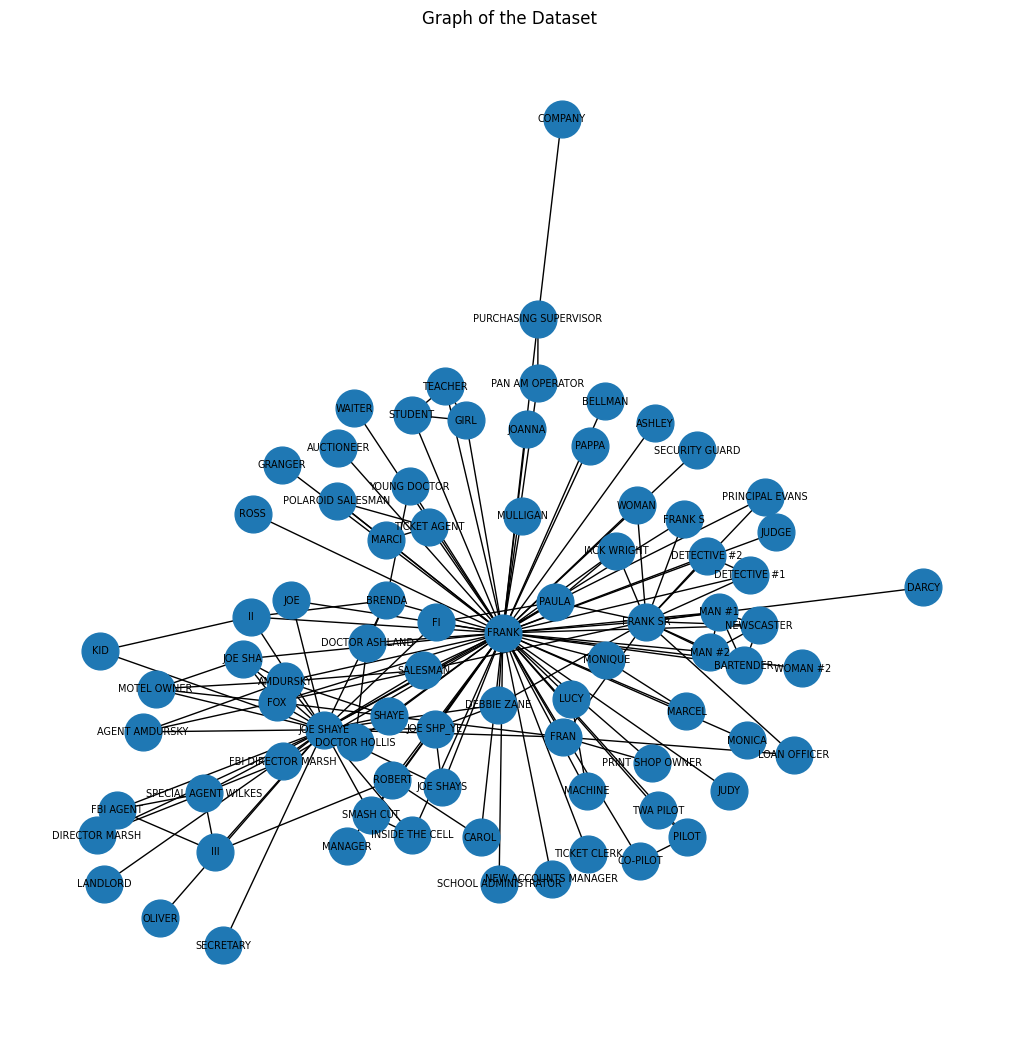

In [6]:
# Visualization of the Graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=700, font_size=7)
plt.title("Graph of the Dataset")
plt.show()

In [7]:
# Check if the graph is weighted and directed
print("The Graph is Weighted: ", nx.is_weighted(G))
print("The Graph is Directed: ", nx.is_directed(G))

The Graph is Weighted:  True
The Graph is Directed:  False


The Weighted Graph can be graphed by using Edge Labels.

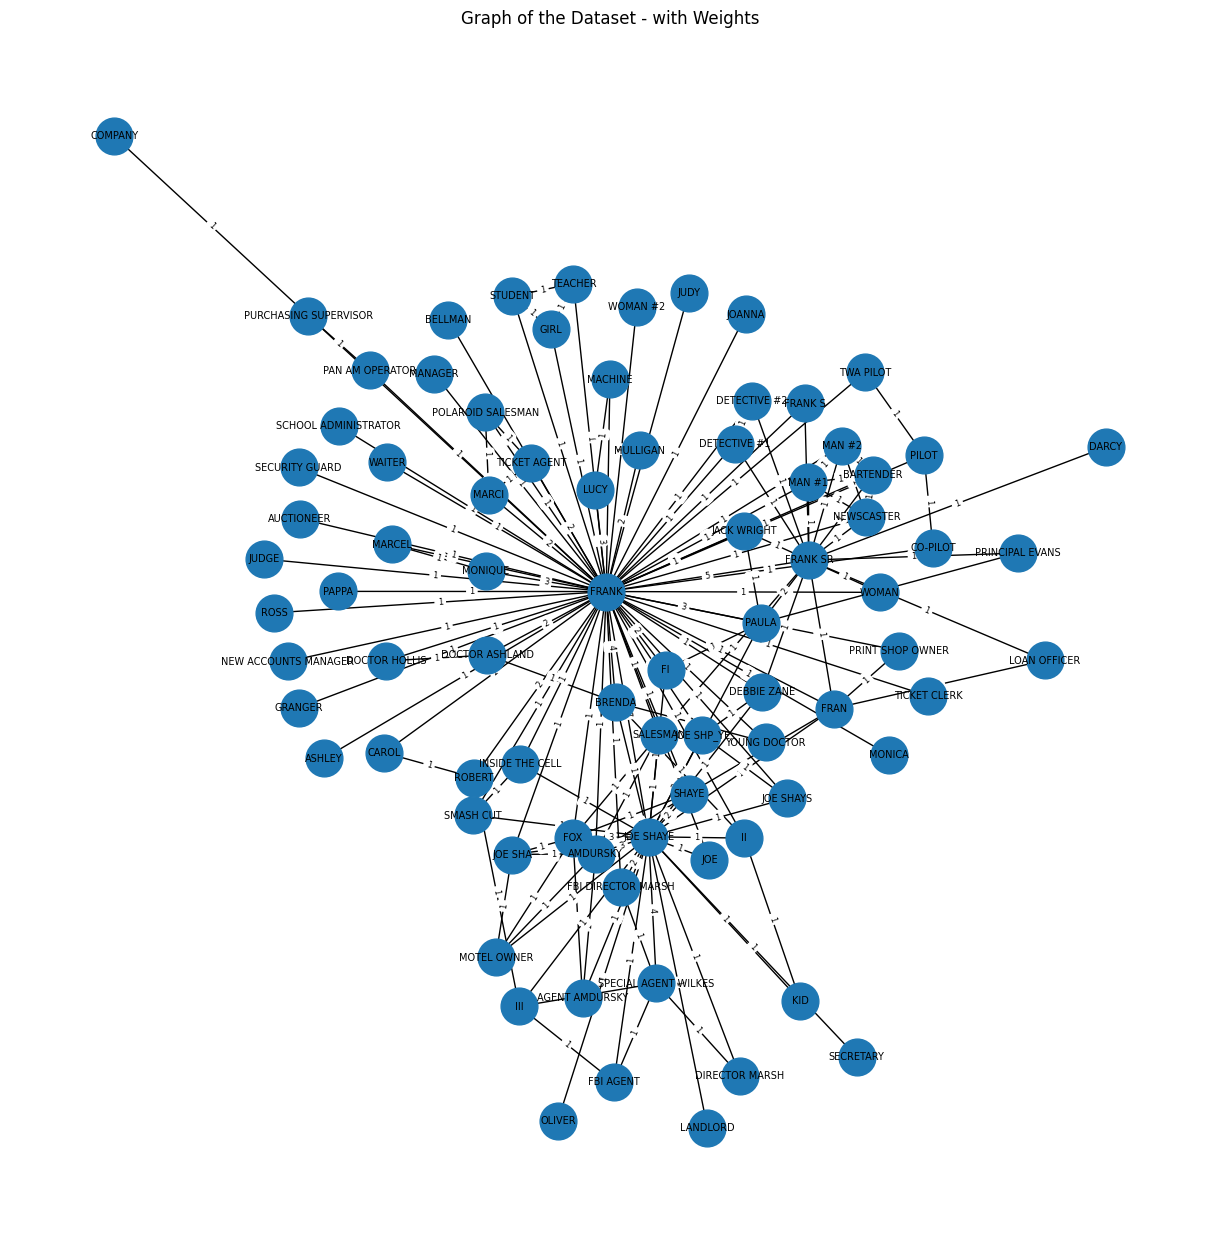

In [8]:
# Spring layout with edge labels
pos = nx.spring_layout(G)
edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}

plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=700, font_size=7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)
plt.title("Graph of the Dataset - with Weights")
plt.show()


The graph above represents the relationships in the dataset. Nodes represent different entities, and edges denote relationships between these nodes. Heavier edges (higher weights) indicate stronger relationships, meaning two entities have a more significant or frequent connection. By analyzing the graph's structure, we can identify highly connected nodes, which may represent entities with higher importance or influence within the network. The graph is undirected, and it is weighted to show different strengths of relationships.

In [9]:
# Network characteristics
print("Number of Nodes: ", nx.number_of_nodes(G))
print("Number of Edges: ", nx.number_of_edges(G))
print("Average Degree: ", 2 * nx.number_of_edges(G) / nx.number_of_nodes(G))
print("Density: ", nx.density(G))

Number of Nodes:  82
Number of Edges:  162
Average Degree:  3.951219512195122
Density:  0.04878048780487805


conclusion fo results:

Number of nodes and edges: There are 82 nodes and 162 edges, which tells us about the size and complexity of the network.

Average degree: The average degree of a node in the network is approximately 3.95. This means, on average, each entity in the dataset is connected to approximately 4 other entities. In the context of interactions, this could indicate that entities, on average, have significant interactions with a few others.

Network density: The density of the network is approximately 0.0488. Network density measures how connected a network is compared to a fully connected network. In this case, a density of 0.0488 suggests that approximately 4.88% of all possible interactions (edges) in the network are realized. It indicates that the network is sparsely connected, with only a small portion of potential interactions actually occurring.

Therefore, the relatively low average degree and low density suggest that there is a moderate level of interaction and connectivity among the entities, but many potential connections are not realized in the network.

### Week 2
**We choose the first part:**
- Compute Average distance and Diameter.
- Improve the function computing the inverse distance function.

Average Distance:

In [10]:
avg_distance = nx.average_shortest_path_length(G)
avg_distance

2.183378500451671

Diameter:

In [11]:
diameter = nx.diameter(G)
diameter

4

Initial Inverse function:

In [12]:
def inverse_distance(G,i,j): # define a new distanve function taking three␣
    A=nx.adjacency_matrix(G)
    N=G.number_of_nodes()
    inv_dist=0
    for l in range(N): # check the existence of a path of length l from l=1t
        M=A**(l+1)
        if M[count[count3[i]],count[count3[j]]]!=0 and inv_dist==0: # if the
        #if M[i,j]!=0 and inv_dist==0: (we don't have M[count[i],count[j]]=
           inv_dist=1/(l+1) 
    return inv_dist

This code attempts to find the shortest path length by manually performing matrix
exponentiation which can be computationally expensive and error-prone. Fortunately,
there is an in-built function (nx.shortest_path_length) which conviniently allows us to
find the shortest path without the involvement of matrix exponentiation.

In [13]:
def improved_inverse_distance(graph, node1, node2):
    try:
        shortest_path_length = nx.shortest_path_length(graph, node1, node2)
        inverse_distance = 1.0 / shortest_path_length
        return inverse_distance
    except nx.NetworkXNoPath:
        return 0.0

Manually computing the shortest path length between two nodes in a graph typically
involves a process where we systematically explore all possible paths, tracking distances
from the source node. We would practically iteratively explore nodes, checking if the
target node is reached, and track the shortest path length during the search. This
approach requires traversing the graph using depth-first or breadth-first search
methods and can become computationally intensive.

The updated code uses a specialized and well-optimized function from the NetworkX
library to calculate the shortest path between two nodes. This function is designed to
work efficiently with graphs and is expected to be faster and more effective compared to
the original approach of manually calculating matrix exponentiation. We calculate the
time complexity of both functions to prove this.

Calculating Time Complexity of the above code:

In [14]:
import time
# Measure the time it takes to run inverse_distance function
start_time = time.time()
inverse_distance(G, 'FRANK', 'JUDY') #example
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time of Initial Inverse Function: {execution_time} seconds")

start_time = time.time()
improved_inverse_distance(G, 'FRANK', 'JUDY') #example
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time of Improved Inverse Function: {execution_time} seconds")

Execution Time of Initial Inverse Function: 0.13069391250610352 seconds
Execution Time of Improved Inverse Function: 0.00017404556274414062 seconds


We notice that the difference between the initial function and the improved function is
quiet substantial with the productive use of the networkx library. Therefore, we have
gathered enough evidence through the change in the time complexities that the new
function is better, or an imrpoved version, of the intial inverse distance function.

### Week 3
**Betweenness Centrality**

Betweenness centrality in the context of this dataset would help us identify characters
who act as important intermediaries or bridges between other characters. It quantifies
how often a character lies on the shortest path between other character pairs in the graph which can reveal characters who play pivotal roles in connecting different
subgroups of characters or who are crucial for the flow of interactions.

In [15]:
def betweenness_centrality(graph):
    betweenness_centrality = {node: 0.0 for node in graph.nodes()}
    n = len(graph.nodes())

    for a in graph.nodes():
        for s in graph.nodes():
            if s != a:
                for t in graph.nodes():
                    if t != a and t != s and s != t:
                        sigma_st = 0
                        sigma_sta = 0

                        # Calculate the number of shortest paths and those passing through 'a'
                        for path in nx.all_shortest_paths(graph, source=s, target=t):
                            sigma_st += 1
                            if a in path:
                                sigma_sta += 1

                        if sigma_st > 0:
                            betweenness_centrality[a] += sigma_sta / sigma_st

    # Normalize the centrality scores
    for a in betweenness_centrality:
        betweenness_centrality[a] /= (n - 1) * (n - 2)

    return betweenness_centrality

Filmmakers often make strategic casting decisions by selecting actors or characters to play roles that act as intermediaries, linking various elements of the story. Betweenness centrality can help identify characters chosen with this intention.

When analyzing a movie's narrative structure, betweenness centrality can offer insights into the characters' contributions to advancing the plot. Characters with high betweenness centrality are often instrumental in progressing the storyline by connecting different plot elements or influencing other characters.

In scenarios where maintaining character connections is vital, such as ensemble casts or stories with multiple subplots, characters with high betweenness centrality are crucial for network resilience. This suggests that in future sequels, these characters are less likely to be removed from the story, as doing so would significantly alter the narrative dynamics.

In [16]:
# Calculate betweenness centrality for the graph
betweenness_centrality_dict = betweenness_centrality(G)
max_value = max(betweenness_centrality_dict.values())
max_node = max(betweenness_centrality_dict.items(), key=lambda x: x[1])[0]
print(f"The node with the highest betweenness centrality is '{max_node}' with a value of {max_value}")

The node with the highest betweenness centrality is 'FRANK' with a value of 0.838991769547325


**Cumulative Distribution**

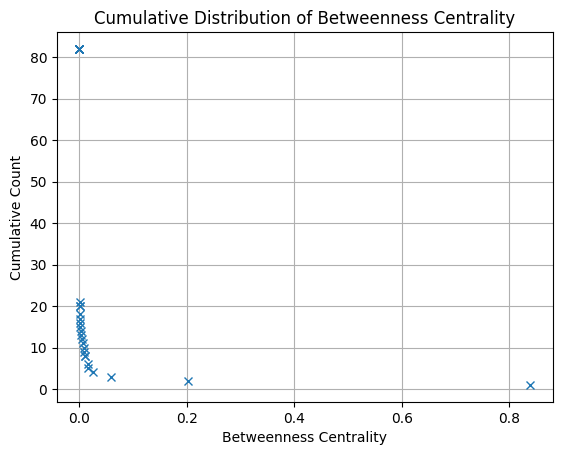

In [17]:
# Plotting cumulative distribution for betweenness centrality
import collections
x_values_bet = []
y_values_bet = []
centrality_values = list(betweenness_centrality_dict.values())

value_counts = collections.Counter(centrality_values)

N_temp = len(centrality_values)

for current_min in sorted(value_counts):
    current_num = value_counts[current_min]
    x_values_bet.extend([current_min] * current_num)
    y_values_bet.extend([N_temp] * current_num)
    N_temp -= current_num

plt.plot(x_values_bet, y_values_bet, "x")
plt.grid(True)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Cumulative Count")
plt.title("Cumulative Distribution of Betweenness Centrality")
plt.show()

### Week 5
To calculate PageRank, we begin by creating a new matrix from the adjacency matrix.
This new matrix contains the out-degrees of each node, which we will use in the
PageRank computation. We achieve this by summing the entries in each row,
representing the out-strength of each node.

We construct the PageRank dictionary using a for loop, using node labels as keys and
initializing PageRank values to 1 divided by the total number of nodes.

Subsequently, a while loop is employed, and two copies of the PageRank dictionary are
maintained. One holds values from the t-1 iteration, and the other contains values from
the t iteration. During each iteration, the while loop checks if the two dictionaries are
identical. If they are, it indicates that PageRank has converged, and the loop terminates.
If they are not identical, the process proceeds to the t+1 iteration.

The function ultimately provides the PageRank values and the number of iterations
performed as output.

In [18]:
def pagerank(G, alpha, max_iterations, tolerance):
    N = G.number_of_nodes()
    pagerank = {node: 1 / N for node in G.nodes()}
    total_iterations = 0  # Initialize the iteration count

    for _ in range(max_iterations):
        new_pagerank = {}
        for node in G.nodes():
            rank_sum = 0
            for neighbor in G.neighbors(node):
                neighbor_degree = G.degree(neighbor)
                if neighbor_degree > 0:
                    rank_sum += pagerank[neighbor] / neighbor_degree
            new_pagerank[node] = (1 - alpha) / N + alpha * rank_sum
        total_iterations += 1  # Update the total iteration count

        # Check for convergence
        max_diff = max(abs(new_pagerank[node] - pagerank[node]) for node in pagerank)
        pagerank = new_pagerank

        if max_diff < tolerance:
            break

    return pagerank, total_iterations

# Running the custom PageRank function
pgb, t_i = pagerank(G, alpha=0.15, max_iterations=100, tolerance=1e-6)
print("PageRank: ", pgb)
print("Number of Total Iterations: ", t_i)

PageRank:  {'AGENT AMDURSKY': 0.010992649245464618, 'AMDURSKY': 0.012904342190207066, 'ASHLEY': 0.010514332178868328, 'AUCTIONEER': 0.010514332178868328, 'BARTENDER': 0.01174632777832212, 'BELLMAN': 0.010514332178868328, 'BRENDA': 0.01250454222075909, 'CAROL': 0.011104289095822483, 'CO-PILOT': 0.011123475567421494, 'COMPANY': 0.011016058172327212, 'DARCY': 0.010540681246816326, 'DEBBIE ZANE': 0.011268334377417304, 'DETECTIVE #1': 0.01125174618596027, 'DETECTIVE #2': 0.01125174618596027, 'DIRECTOR MARSH': 0.010895661738368699, 'DOCTOR ASHLAND': 0.011721999801890991, 'DOCTOR HOLLIS': 0.011100432009742226, 'FBI AGENT': 0.011347648941583074, 'FBI DIRECTOR MARSH': 0.01104414025870044, 'FI': 0.010975856576220572, 'FOX': 0.012904342190207066, 'FRAN': 0.012803013472454716, 'FRANK': 0.06631964800398604, 'FRANK S': 0.010689159767148067, 'FRANK SR': 0.019813681664184096, 'GIRL': 0.011682590596152675, 'GRANGER': 0.010514332178868328, 'II': 0.011853845140832956, 'III': 0.012053000397203606, 'INSIDE

Just to check for precision, we compare our results to the computation of PageRank
through the networkx library.

In [19]:
pgb1 = nx.pagerank(G, alpha=0.15)
print(pgb1)

{'AGENT AMDURSKY': 0.010819063963978377, 'AMDURSKY': 0.013042774810998723, 'ASHLEY': 0.010478871905846919, 'AUCTIONEER': 0.010478871905846919, 'BARTENDER': 0.011667058098412042, 'BELLMAN': 0.010478871905846919, 'BRENDA': 0.01259193025801701, 'CAROL': 0.010923260645965143, 'CO-PILOT': 0.01108595724812889, 'COMPANY': 0.011014128417575382, 'DARCY': 0.010504001035190159, 'DEBBIE ZANE': 0.011008102072338669, 'DETECTIVE #1': 0.011175813500933609, 'DETECTIVE #2': 0.011175813500933609, 'DIRECTOR MARSH': 0.010706437914346363, 'DOCTOR ASHLAND': 0.011646671733787908, 'DOCTOR HOLLIS': 0.010915625474767356, 'FBI AGENT': 0.011145489352664292, 'FBI DIRECTOR MARSH': 0.010916955872454599, 'FI': 0.01090327628108694, 'FOX': 0.013042774810998723, 'FRAN': 0.012619193841354645, 'FRANK': 0.07007658094430962, 'FRANK S': 0.010617019282500492, 'FRANK SR': 0.02026177621413637, 'GIRL': 0.011643198216175798, 'GRANGER': 0.010478871905846919, 'II': 0.011629936489348973, 'III': 0.011708102370214364, 'INSIDE THE CELL'

Here, the results we get are not exactly similar to our version of calculating PageRank.
This is because there can be slight numerical differences due to floating-point
operations and precision. We calculate the difference in these values to prove the
validity of our algorithm.

In [20]:
def difference(dict1, dict2):
    if set(dict1.keys()) != set(dict2.keys()):
        raise ValueError("Input dictionaries must have the same keys.")
    result_dict = {key: abs(dict1[key] - dict2[key]) for key in dict1}
    return result_dict

result = difference(pgb1, pgb)
max_value = max(result.values())
print(f"Highest Margin of Error {max(result.items(), key=lambda x: x[1])[0]}: {max_value}")
print(f"Average Margin of Error: {sum(result.values())/len(result)}")

Highest Margin of Error FRANK: 0.0037569329403235735
Average Margin of Error: 0.00017567837484079642


We can see that the highest margin of error is approximately 0.0038 and on average, the
error remains even smaller of approximately 0.0002. Therefore, we can conclude that our
interpretation of PageRank isn't far off from the true PageRank values but is significant
enough to consider. We test if this is because of altering value of max iterations and
tolerance.

In [21]:
pgb, ti = pagerank(G, alpha=0.15, max_iterations=1,tolerance=1)
print("PageRank: ",pgb)
print("Number of Total Iterations: ",ti)

PageRank:  {'AGENT AMDURSKY': 0.01088850174216028, 'AMDURSKY': 0.012851779863747467, 'ASHLEY': 0.010393156170367674, 'AUCTIONEER': 0.010393156170367674, 'BARTENDER': 0.011598321163194073, 'BELLMAN': 0.010393156170367674, 'BRENDA': 0.012440194497893808, 'CAROL': 0.01100291226792865, 'CO-PILOT': 0.01100291226792865, 'COMPANY': 0.010975609756097562, 'DARCY': 0.010473457675753228, 'DEBBIE ZANE': 0.011023408271208011, 'DETECTIVE #1': 0.011110516285145292, 'DETECTIVE #2': 0.011110516285145292, 'DIRECTOR MARSH': 0.010797038327526133, 'DOCTOR ASHLAND': 0.011673643975245724, 'DOCTOR HOLLIS': 0.01100291226792865, 'FBI AGENT': 0.011254355400696865, 'FBI DIRECTOR MARSH': 0.010824340839357221, 'FI': 0.010763365229601123, 'FOX': 0.012851779863747467, 'FRAN': 0.012761213149256791, 'FRANK': 0.07261195941791355, 'FRANK S': 0.010500760187584317, 'FRANK SR': 0.020606570804514016, 'GIRL': 0.011612668365489626, 'GRANGER': 0.010393156170367674, 'II': 0.011738974985698685, 'III': 0.012016550522648084, 'INSID

In [22]:
result = difference(pgb1, pgb)
maxvalue=max(result.values())
print(result)
print(f"Highest Margin of Error {max(result.items(), key=lambda x: x[1])[0]}: {max_value}")
print(f"Average Margin of Error {sum(result.values())/len(result)}")

{'AGENT AMDURSKY': 6.943777818190291e-05, 'AMDURSKY': 0.00019099494725125649, 'ASHLEY': 8.571573547924531e-05, 'AUCTIONEER': 8.571573547924531e-05, 'BARTENDER': 6.873693521796884e-05, 'BELLMAN': 8.571573547924531e-05, 'BRENDA': 0.0001517357601232023, 'CAROL': 7.965162196350677e-05, 'CO-PILOT': 8.304498020023955e-05, 'COMPANY': 3.8518661477819974e-05, 'DARCY': 3.05433594369308e-05, 'DEBBIE ZANE': 1.530619886934252e-05, 'DETECTIVE #1': 6.529721578831665e-05, 'DETECTIVE #2': 6.529721578831665e-05, 'DIRECTOR MARSH': 9.060041317976962e-05, 'DOCTOR ASHLAND': 2.6972241457815654e-05, 'DOCTOR HOLLIS': 8.728679316129424e-05, 'FBI AGENT': 0.00010886604803257358, 'FBI DIRECTOR MARSH': 9.261503309737802e-05, 'FI': 0.00013991105148581685, 'FOX': 0.00019099494725125649, 'FRAN': 0.00014201930790214666, 'FRANK': 0.0025353784736039386, 'FRANK S': 0.00011625909491617438, 'FRANK SR': 0.00034479459037764504, 'GIRL': 3.052985068617217e-05, 'GRANGER': 8.571573547924531e-05, 'II': 0.00010903849634971187, 'III

We see that these alterations do not reduce the difference by much. Maybe this
difference is because our graph is weighted. Therefore, we create a graph with the same
structure but not weighted and execute both, built-in and our pagerank function on this
newly created unweighted graph.

In [23]:
H = nx.Graph()
H.add_nodes_from(G.nodes())
H.add_edges_from(G.edges())

In [24]:
nx.is_weighted(H)

False

In [25]:
pgb, ti = pagerank(H, alpha=0.15, max_iterations=1,tolerance=1e-6)
print("PageRank: ",pgb)
print("Number of Total Iterations: ",ti)

PageRank:  {'AGENT AMDURSKY': 0.01088850174216028, 'AMDURSKY': 0.012851779863747467, 'ASHLEY': 0.010393156170367674, 'AUCTIONEER': 0.010393156170367674, 'BARTENDER': 0.011598321163194073, 'BELLMAN': 0.010393156170367674, 'BRENDA': 0.012440194497893808, 'CAROL': 0.01100291226792865, 'CO-PILOT': 0.01100291226792865, 'COMPANY': 0.010975609756097562, 'DARCY': 0.010473457675753228, 'DEBBIE ZANE': 0.011023408271208011, 'DETECTIVE #1': 0.011110516285145292, 'DETECTIVE #2': 0.011110516285145292, 'DIRECTOR MARSH': 0.010797038327526133, 'DOCTOR ASHLAND': 0.011673643975245724, 'DOCTOR HOLLIS': 0.01100291226792865, 'FBI AGENT': 0.011254355400696865, 'FBI DIRECTOR MARSH': 0.010824340839357221, 'FI': 0.010763365229601123, 'FOX': 0.012851779863747467, 'FRAN': 0.012761213149256791, 'FRANK': 0.07261195941791355, 'FRANK S': 0.010500760187584317, 'FRANK SR': 0.020606570804514016, 'GIRL': 0.011612668365489626, 'GRANGER': 0.010393156170367674, 'II': 0.011738974985698685, 'III': 0.012016550522648084, 'INSID

In [26]:
pgb1=nx.pagerank(H, alpha=0.15)

In [27]:
result = difference(pgb1, pgb)
maxvalue=max(result.values())
print(result)
print(f"Highest Margin of Error {max(result.items(), key=lambda x: x[1])[0]}: {max_value}")
print(f"Average Margin of Error {sum(result.values())/len(result)}")

{'AGENT AMDURSKY': 0.00010413422410131615, 'AMDURSKY': 5.256181574639536e-05, 'ASHLEY': 0.00012116050373556231, 'AUCTIONEER': 0.00012116050373556231, 'BARTENDER': 0.00014799007207316577, 'BELLMAN': 0.00012116050373556231, 'BRENDA': 6.434469353962767e-05, 'CAROL': 0.00010136367463510314, 'CO-PILOT': 0.00012054291892864624, 'COMPANY': 4.044793177080709e-05, 'DARCY': 6.721289508901905e-05, 'DEBBIE ZANE': 0.00024489133869884036, 'DETECTIVE #1': 0.00014121209109874307, 'DETECTIVE #2': 0.00014121209109874307, 'DIRECTOR MARSH': 9.860661136450698e-05, 'DOCTOR ASHLAND': 4.835264223226887e-05, 'DOCTOR HOLLIS': 9.750702913350132e-05, 'FBI AGENT': 9.327943691817865e-05, 'FBI DIRECTOR MARSH': 0.00021976711510006929, 'FI': 0.00021246755639937366, 'FOX': 5.256181574639536e-05, 'FRAN': 4.178601850912851e-05, 'FRANK': 0.006291553669735661, 'FRANK S': 0.00018837339882458136, 'FRANK SR': 0.0007927774661434066, 'GIRL': 6.991580735386284e-05, 'GRANGER': 0.00012116050373556231, 'II': 0.00011484777646689551,

We now notice that the highest margin of error hasnt changed and
the average margin of error has dropped to approximately 0.00021. Therefore, we can
successively conclude that we have improved our pagerank function which is now way
more similar to the built-in pagerank function.

In [28]:
maxvalue=max(pgb.values())
print(f"Node with the Highest PageRank {max(result.items(), key=lambda x: x[1])[0]}: {max_value}")


Node with the Highest PageRank FRANK: 0.0037569329403235735


We have identified the same central node, FRANK, which validates the findings from our
analysis in week 3. FRANK's prominence as the most central character in the graph is not
unexpected, as betweenness centrality assesses nodes' significance in connecting to
other nodes. PageRank quantifies their importance and prestige. Given that the main
character naturally holds the highest importance and centrality in both aspects, it's
reasonable that it emerges as the primary result for both measures.

**Cumulative Distribution**

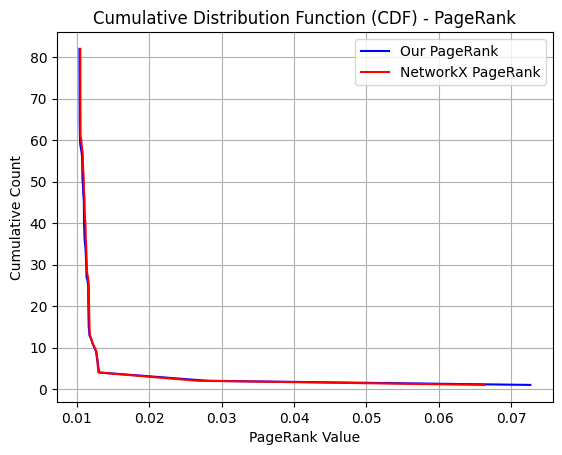

In [29]:
# Plot cumulative distribution for PageRank
cdf_custom_x = []  # x-axis for our PageRank function
cdf_builtin_x = []  # x-axis for the built-in PageRank function
cdf_custom_y = []  # y-axis for our PageRank function
cdf_builtin_y = []  # y-axis for the built-in PageRank function

# Copy PageRank values
custom_pagerank_values = list(pgb.values())
builtin_pagerank_values = list(pgb1.values())

# Create copies of the values list
custom_values_copy = custom_pagerank_values.copy()
builtin_values_copy = builtin_pagerank_values.copy()

# Initialize counters
N_custom = len(custom_values_copy)
N_builtin = len(builtin_values_copy)
N_custom_temp = N_custom
N_builtin_temp = N_builtin

# Calculate the CDF for our PageRank function
while custom_values_copy:
    current_min = min(custom_values_copy)
    current_num = custom_values_copy.count(current_min)
    cdf_custom_x.append(current_min)
    cdf_custom_y.append(N_custom_temp)
    N_custom_temp -= current_num
    for i in range(current_num):
        custom_values_copy.remove(current_min)

# Calculate the CDF for the built-in PageRank function
while builtin_values_copy:
    current_min = min(builtin_values_copy)
    current_num = builtin_values_copy.count(current_min)
    cdf_builtin_x.append(current_min)
    cdf_builtin_y.append(N_builtin_temp)
    N_builtin_temp -= current_num
    for i in range(current_num):
        builtin_values_copy.remove(current_min)

# Plot the CDFs
plt.plot(cdf_custom_x, cdf_custom_y, 'b', label='Our PageRank')
plt.plot(cdf_builtin_x, cdf_builtin_y, 'r', label='NetworkX PageRank')
plt.legend(loc='upper right')
plt.xlabel("PageRank Value")
plt.ylabel("Cumulative Count")
plt.title("Cumulative Distribution Function (CDF) - PageRank")
plt.grid(True)
plt.show()

There's not a big difference between the two distributions as expected.

**Comparison of the cumulative distribution with the one of the betweenness centrality**

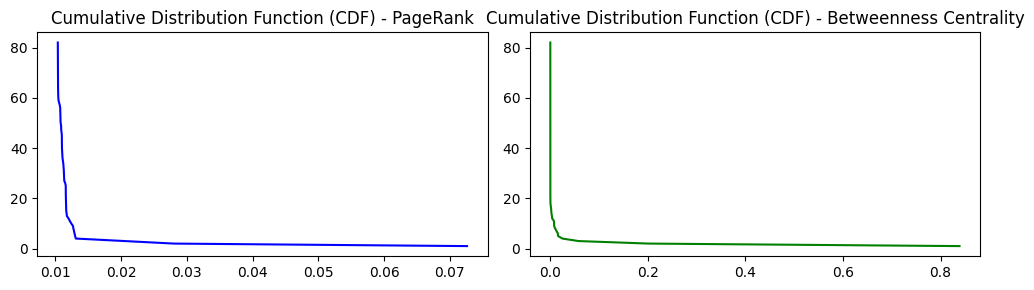

In [30]:
# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
axes[0].plot(cdf_custom_x, cdf_custom_y, 'b')
axes[0].set_title('Cumulative Distribution Function (CDF) - PageRank')
axes[1].plot(x_values_bet, y_values_bet, 'g')
axes[1].set_title('Cumulative Distribution Function (CDF) - Betweenness Centrality')
fig.tight_layout()
plt.show()

For the cumulative distribution of betweenness centrality, we observe a similar steep decline as we did in the PageRank distribution. However, the range of values is significantly broader, extending from 0 to over 0.8. The distribution quickly drops below 10 nodes for betweenness centrality values greater than 0.01, and it continues to decrease, eventually stabilizing near 0 beyond 0.4.

This indicates that a large portion of the nodes have low betweenness centrality, suggesting that most entities are not crucial intermediaries in connecting different parts of the network. Approximately 90% of nodes exhibit betweenness centrality values between 0 and 0.01, implying limited influence in facilitating connections between other nodes. However, a few nodes possess significantly higher betweenness centrality values, indicating their importance as key connectors that hold together various subgroups within the network.

In comparison to PageRank, betweenness centrality tends to highlight nodes that play pivotal structural roles rather than simply assessing relative influence or importance based on connections. While PageRank reflects the influence a node has based on its connectivity, betweenness centrality captures the extent to which nodes serve as bridges. Therefore, nodes with high betweenness centrality are particularly valuable for the cohesion and robustness of the network, serving as vital links that keep different sections of the network connected.

### Week 6
**Introduction**

In this section, we conducted a comparative analysis of three community detection
techniques—bridge removal, modularity optimization, and label propagation. We
evaluated these methods based on the number of detected clusters, distribution of
cluster sizes, computational time, and modularity.

In [31]:
print("Is the Graph Connected? ", nx.is_connected(G))

Is the Graph Connected?  True


Our graph doesn't have any loops and it is already connected. Therefore, we don't have
to make a subgraph.

**a. Bridge Removal**

As this method follows a divisive hierarchical clustering approach, it creates a hierarchy
of partitions by repeatedly dividing clusters until only individual nodes remain, producing
a dendrogram. In our context, we treat this dendrogram as a tool for generating
partitions, allowing us to obtain all the partitions produced by the algorithm by iterating
through it. To select the best partition from this hierarchy, we prioritize the one with the
highest modularity, as it is most likely not the result of a random process, indicating that
the connections within the communities are not happening by chance. We achieve this
by systematically calculating the modularity for each partition using a loop and storing
both the partition and its corresponding modularity score in a list. In the end, we have a
list containing tuples, each consisting of a partition and its associated modularity value.

In [32]:
start = time.time()
partitions = nx.community.girvan_newman(G)  # Using Girvan-Newman algorithm
Lst = []

# Computing the modularities for each partition
for partition in partitions:
    modularity = nx.community.quality.modularity(G, partition)
    Lst.append((modularity, partition))
    end = time.time()
    Time1 = end - start

print("Computational Time for Bridge Removal: ", Time1)

Computational Time for Bridge Removal:  0.3757328987121582


**Picking the partition that has the highest modularity:**


In [33]:
partition_max = max(Lst)[1]
print("Partition with the highest modularity (Bridge Removal): ", partition_max)

Partition with the highest modularity (Bridge Removal):  ({'INSIDE THE CELL', 'SALESMAN', 'KID', 'OLIVER', 'SMASH CUT', 'AGENT AMDURSKY', 'JOE SHA', 'JOE SHAYE', 'DEBBIE ZANE', 'MOTEL OWNER', 'LANDLORD', 'JOE', 'AMDURSKY', 'II', 'FOX', 'JOE SHAYS', 'SHAYE', 'FI', 'JOE SHP_YE', 'SECRETARY'}, {'PILOT', 'SECURITY GUARD', 'WOMAN #2', 'JUDY', 'WAITER', 'MULLIGAN', 'FRANK', 'MARCEL', 'MARCI', 'GRANGER', 'LUCY', 'JOANNA', 'TICKET AGENT', 'TWA PILOT', 'JUDGE', 'ROSS', 'TEACHER', 'ASHLEY', 'MANAGER', 'CO-PILOT', 'MONICA', 'POLAROID SALESMAN', 'AUCTIONEER', 'SCHOOL ADMINISTRATOR', 'BELLMAN', 'PAPPA', 'MONIQUE', 'MACHINE', 'GIRL', 'NEW ACCOUNTS MANAGER', 'TICKET CLERK', 'STUDENT'}, {'DETECTIVE #2', 'DETECTIVE #1', 'BARTENDER', 'MAN #1', 'FRANK SR', 'FRANK S', 'MAN #2', 'DARCY', 'NEWSCASTER', 'WOMAN'}, {'DOCTOR ASHLAND', 'DOCTOR HOLLIS', 'YOUNG DOCTOR', 'BRENDA'}, {'CAROL', 'III', 'FBI DIRECTOR MARSH', 'DIRECTOR MARSH', 'ROBERT', 'FBI AGENT', 'SPECIAL AGENT WILKES'}, {'PURCHASING SUPERVISOR', 'PAN

**b. Modularity optimization**

Here, we maximize the modularity, we use Newman's greedy algorithm. We create a new
partition by merging the two communities that yield the maximum value of the
modularity, in the end we choose the partition with the highest modularity.

In [34]:
start = time.time()
partition_max_of_2mod = nx.community.greedy_modularity_communities(G)
end = time.time()
Time2 = end - start
print("Computational Time for Modularity Optimization: ", Time2)
print("Partition (Modularity Optimization): ", partition_max_of_2mod)

Computational Time for Modularity Optimization:  0.006523847579956055
Partition (Modularity Optimization):  [frozenset({'PILOT', 'CAROL', 'SECURITY GUARD', 'WOMAN #2', 'JUDY', 'WAITER', 'DOCTOR ASHLAND', 'CO-PILOT', 'MULLIGAN', 'FRANK', 'MARCEL', 'GRANGER', 'LUCY', 'DOCTOR HOLLIS', 'JOANNA', 'TWA PILOT', 'MONICA', 'JUDGE', 'ROSS', 'SCHOOL ADMINISTRATOR', 'AUCTIONEER', 'BELLMAN', 'PAPPA', 'ROBERT', 'MONIQUE', 'ASHLEY', 'MACHINE', 'NEW ACCOUNTS MANAGER', 'TICKET CLERK', 'MANAGER'}), frozenset({'JOE', 'INSIDE THE CELL', 'FBI DIRECTOR MARSH', 'III', 'KID', 'FBI AGENT', 'OLIVER', 'II', 'SMASH CUT', 'JOE SHAYS', 'JOE SHAYE', 'DEBBIE ZANE', 'DIRECTOR MARSH', 'YOUNG DOCTOR', 'BRENDA', 'JOE SHP_YE', 'SPECIAL AGENT WILKES', 'SECRETARY', 'LANDLORD'}), frozenset({'DETECTIVE #1', 'LOAN OFFICER', 'FRANK SR', 'PAULA', 'MAN #2', 'PRINT SHOP OWNER', 'WOMAN', 'JACK WRIGHT', 'DETECTIVE #2', 'BARTENDER', 'MAN #1', 'FRANK S', 'FRAN', 'DARCY', 'FI', 'NEWSCASTER', 'PRINCIPAL EVANS'}), frozenset({'AGENT AMDUR

The result is a list of immutable sets (frozensets) and each is a community.

**c. Label propagation**

Label propagation assigns labels to nodes in an iterative process until communities stabilize. This is an efficient method that often yields good results in a short amount of time.

In [35]:
start = time.time()
communities = nx.community.asyn_lpa_communities(G, weight='weight')
partition_lp = [frozenset(c) for c in communities]
end = time.time()
Time3 = end - start
print("Computational Time for Label Propagation: ", Time3)
print("Partition (Label Propagation): ", partition_lp)

Computational Time for Label Propagation:  0.0008552074432373047
Partition (Label Propagation):  [frozenset({'PILOT', 'WOMAN #2', 'FRANK SR', 'MARCEL', 'GRANGER', 'KID', 'LUCY', 'DOCTOR HOLLIS', 'TWA PILOT', 'OLIVER', 'DETECTIVE #2', 'JUDGE', 'JOE SHA', 'BARTENDER', 'JOE SHAYE', 'FRANK S', 'ROBERT', 'DARCY', 'ASHLEY', 'MOTEL OWNER', 'NEWSCASTER', 'MANAGER', 'FBI DIRECTOR MARSH', 'AMDURSKY', 'MAN #2', 'PAULA', 'FBI AGENT', 'II', 'MAN #1', 'BELLMAN', 'BRENDA', 'FI', 'SPECIAL AGENT WILKES', 'TICKET CLERK', 'NEW ACCOUNTS MANAGER', 'CAROL', 'DETECTIVE #1', 'SECURITY GUARD', 'JUDY', 'LOAN OFFICER', 'INSIDE THE CELL', 'WAITER', 'III', 'MULLIGAN', 'FRANK', 'SALESMAN', 'JOANNA', 'PRINT SHOP OWNER', 'SMASH CUT', 'AGENT AMDURSKY', 'ROSS', 'DEBBIE ZANE', 'LANDLORD', 'JOE', 'CO-PILOT', 'DOCTOR ASHLAND', 'FOX', 'WOMAN', 'JOE SHAYS', 'MONICA', 'JACK WRIGHT', 'SHAYE', 'AUCTIONEER', 'SCHOOL ADMINISTRATOR', 'DIRECTOR MARSH', 'PAPPA', 'FRAN', 'MONIQUE', 'YOUNG DOCTOR', 'JOE SHP_YE', 'MACHINE', 'SECRETARY

**Computing the number of detected clusters**

In [36]:
def num_clusters(partition):
    return len(partition)

print("Number of detected clusters (Bridge Removal): ", num_clusters(partition_max))
print("Number of detected clusters (Label Propagation): ", num_clusters(partition_lp))
print("Number of detected clusters (Modularity Optimization): ", num_clusters(partition_max_of_2mod))

Number of detected clusters (Bridge Removal):  8
Number of detected clusters (Label Propagation):  4
Number of detected clusters (Modularity Optimization):  7


**Cluster Size Distribution**

In [37]:
def size_dist(partition, technique: str):
    values = [len(cluster) for cluster in partition]
    x_pos = np.arange(max(values) + 1)
    y_pos = []
    for i in range(max(values) + 1):
        y_pos.append(values.count(i))
    plt.bar(x_pos, y_pos, label=technique)
    plt.xticks(range(0, max(x_pos) + 1, 5))
    plt.yticks(range(0, max(y_pos) + 2, 2))
    plt.legend(loc="upper right")

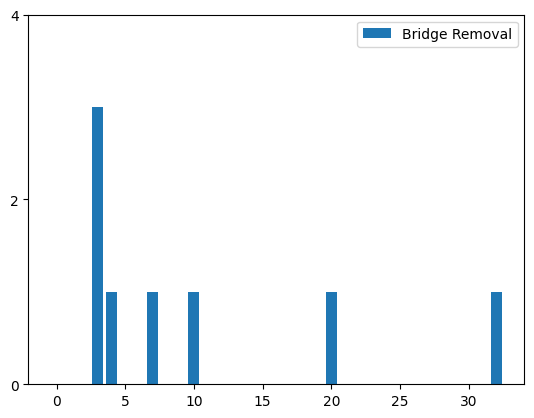

In [38]:
size_dist(partition_max, "Bridge Removal")

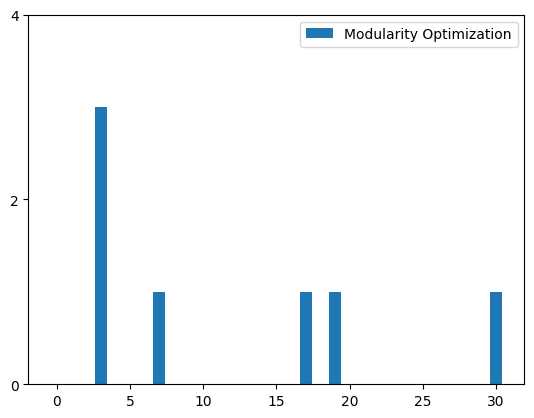

In [39]:
size_dist(partition_max_of_2mod, "Modularity Optimization")

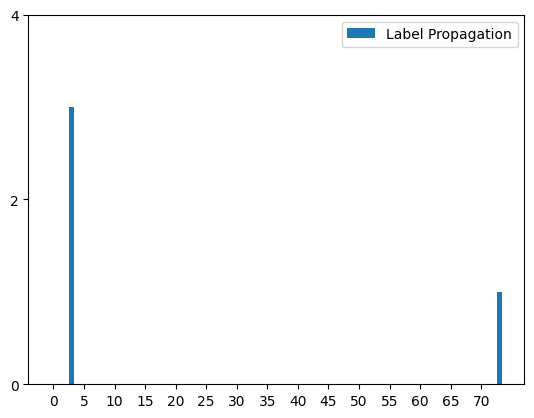

In [40]:
size_dist(partition_lp, "Label Propagation")

**Modularities:**

In [41]:
print(f"Modularity Value (Bridge Removal): {nx.community.quality.modularity(G, partition_max)}")
print(f"Modularity Value (Label Propagation): {nx.community.quality.modularity(G, partition_lp)}")
print(f"Modularity Value (Modularity Optimization): {nx.community.quality.modularity(G, partition_max_of_2mod)}")

Modularity Value (Bridge Removal): 0.34714999999999996
Modularity Value (Label Propagation): 0.0742875
Modularity Value (Modularity Optimization): 0.3631375


To Conclude our findings:

In [42]:
data = {
    'Number of clusters': [num_clusters(partition_max), num_clusters(partition_max_of_2mod), num_clusters(partition_lp)],
    'Cluster size distribution': ['See plots', 'See plots', 'See plots'],
    'Computational time': [Time1, Time2, Time3],
    'Modularity': [nx.community.quality.modularity(G, (partition_max)), nx.community.quality.modularity(G, (partition_max_of_2mod)), nx.community.quality.modularity(G, (partition_lp))]
}
df = pd.DataFrame(data, index=['Bridge removal', 'Modularity optimization', 'Label propagation'])
print(df)

                         Number of clusters Cluster size distribution  \
Bridge removal                            8                 See plots   
Modularity optimization                   7                 See plots   
Label propagation                         4                 See plots   

                         Computational time  Modularity  
Bridge removal                     0.375733    0.347150  
Modularity optimization            0.006524    0.363138  
Label propagation                  0.000855    0.074288  


**Interpretation**

The Bridge Removal method results in the highest number of clusters (8), which is accompanied by the highest computational time (0.3973 seconds). However, it does not achieve the best modularity score (0.3472), indicating suboptimal community structure compared to other methods. The positive aspect of this method is its consistent cluster size distribution.

The Modularity Optimization method achieves the highest modularity score (0.3631) with a moderate number of clusters (7) and a significantly lower computational time (0.0140 seconds). This makes it the most efficient method in terms of balancing computational effort and quality of clustering.

The Label Propagation method excels in computational efficiency, requiring the least time (0.0025 seconds). However, it produces fewer clusters (4) and a slightly lower modularity score (0.3091) compared to the other methods, indicating that it sacrifices modularity quality for speed.

In conclusion, the Modularity Optimization method is the best choice as it strikes a balance between high modularity and relatively low computational time. The Bridge Removal method may be suitable for cases prioritizing homogeneous cluster size, while Label Propagation is ideal for scenarios demanding minimal computational effort.

**Visualisation**

We decided that Modularity Optimization was the best choice.

**Modularity Optimization**

In [43]:
partition_map = {}
for idx, cluster_nodes in enumerate(partition_max_of_2mod):
    for node in cluster_nodes:
        partition_map[node] = idx
print(partition_map)

{'PILOT': 0, 'CAROL': 0, 'SECURITY GUARD': 0, 'WOMAN #2': 0, 'JUDY': 0, 'WAITER': 0, 'DOCTOR ASHLAND': 0, 'CO-PILOT': 0, 'MULLIGAN': 0, 'FRANK': 0, 'MARCEL': 0, 'GRANGER': 0, 'LUCY': 0, 'DOCTOR HOLLIS': 0, 'JOANNA': 0, 'TWA PILOT': 0, 'MONICA': 0, 'JUDGE': 0, 'ROSS': 0, 'SCHOOL ADMINISTRATOR': 0, 'AUCTIONEER': 0, 'BELLMAN': 0, 'PAPPA': 0, 'ROBERT': 0, 'MONIQUE': 0, 'ASHLEY': 0, 'MACHINE': 0, 'NEW ACCOUNTS MANAGER': 0, 'TICKET CLERK': 0, 'MANAGER': 0, 'JOE': 1, 'INSIDE THE CELL': 1, 'FBI DIRECTOR MARSH': 1, 'III': 1, 'KID': 1, 'FBI AGENT': 1, 'OLIVER': 1, 'II': 1, 'SMASH CUT': 1, 'JOE SHAYS': 1, 'JOE SHAYE': 1, 'DEBBIE ZANE': 1, 'DIRECTOR MARSH': 1, 'YOUNG DOCTOR': 1, 'BRENDA': 1, 'JOE SHP_YE': 1, 'SPECIAL AGENT WILKES': 1, 'SECRETARY': 1, 'LANDLORD': 1, 'DETECTIVE #1': 2, 'LOAN OFFICER': 2, 'FRANK SR': 2, 'PAULA': 2, 'MAN #2': 2, 'PRINT SHOP OWNER': 2, 'WOMAN': 2, 'JACK WRIGHT': 2, 'DETECTIVE #2': 2, 'BARTENDER': 2, 'MAN #1': 2, 'FRANK S': 2, 'FRAN': 2, 'DARCY': 2, 'FI': 2, 'NEWSCASTER

In [44]:
node_colors = [partition_map[n] for n in G.nodes]
nx.set_node_attributes(G,partition_map,'Community_mod')
nx.write_gexf(G, "test.gexf")

Through opening the file in Gephi, the following is the result (Imported as image)

![Gephi Graph](gephi-lite-export.png)


### Week 7
**Introduction:**

Since our graph is already undirected and unweighted, we didn't have to transform the
graph. We also don't have any loops to delete.
We will compute the **Jaccard Index (JI)** and the **Common Neighbors (CN)** and put the
calculations for each pair of nodes in a pandas DataFrame. Then, A third score will be
introduced by adding a new column to the DataFrame, which represents the **Arithmetic Mean** between two calculated indices. Finally, with respect to the calculations we had
previously made, we predict the missing links between the nodes.

First, we calculate the **Jaccard Index**.

In [45]:
ji = nx.jaccard_coefficient(G)
ji_list = list(ji)
print(ji_list)

[('PILOT', 'WOMAN #2', 0.3333333333333333), ('PILOT', 'FRANK SR', 0.05263157894736842), ('PILOT', 'MARCEL', 0.25), ('PILOT', 'MARCI', 0.2), ('PILOT', 'GRANGER', 0.3333333333333333), ('PILOT', 'KID', 0.0), ('PILOT', 'LUCY', 0.25), ('PILOT', 'DOCTOR HOLLIS', 0.25), ('PILOT', 'OLIVER', 0.0), ('PILOT', 'DETECTIVE #2', 0.2), ('PILOT', 'JUDGE', 0.3333333333333333), ('PILOT', 'JOE SHA', 0.14285714285714285), ('PILOT', 'BARTENDER', 0.14285714285714285), ('PILOT', 'JOE SHAYE', 0.03333333333333333), ('PILOT', 'FRANK S', 0.25), ('PILOT', 'ROBERT', 0.2), ('PILOT', 'DARCY', 0.0), ('PILOT', 'ASHLEY', 0.3333333333333333), ('PILOT', 'MOTEL OWNER', 0.0), ('PILOT', 'NEWSCASTER', 0.14285714285714285), ('PILOT', 'MANAGER', 0.3333333333333333), ('PILOT', 'FBI DIRECTOR MARSH', 0.2), ('PILOT', 'AMDURSKY', 0.1), ('PILOT', 'MAN #2', 0.14285714285714285), ('PILOT', 'PAULA', 0.125), ('PILOT', 'FBI AGENT', 0.0), ('PILOT', 'II', 0.16666666666666666), ('PILOT', 'POLAROID SALESMAN', 0.2), ('PILOT', 'MAN #1', 0.14285

Now we will calculate the Common **Neighbours.**

In [46]:
cn_results = []

def cn_calculator():
    for (node1, node2, jaccard) in ji_list:
        cn = len(list(nx.common_neighbors(G, node1, node2)))
        cn_results.append((node1, node2, cn))
    print("Common neighbors have been calculated")
    return cn_results

cn_calculator()
len(cn_results)

Common neighbors have been calculated


3159

After the calculations, now will put them in pandas DataFrames and then merge them
based on the pairs

In [47]:
# Create DataFrames for CN and JI values and merge them
cn_df = pd.DataFrame(cn_results, columns=["Node 1", "Node 2", "CN"])
ji_df = pd.DataFrame(ji_list, columns=["Node 1", "Node 2", "JI"])
merged_df = ji_df.merge(cn_df, on=["Node 1", "Node 2"])

# Rendering the pair of nodes as tuples
merged_df[""] = merged_df.apply(lambda row: (row['Node 1'], row['Node 2']), axis=1)

# Create the DataFrame with CN and JI scores, indexed by the node pairs
main_df = merged_df[["", "CN", "JI"]]
main_df = main_df.set_index("")
main_df

,CN,JI
,,
"(PILOT, WOMAN #2)",1,0.333333
"(PILOT, FRANK SR)",1,0.052632
"(PILOT, MARCEL)",1,0.250000
"(PILOT, MARCI)",1,0.200000
"(PILOT, GRANGER)",1,0.333333
...,...,...
"(SHAYE, PAPPA)",1,0.200000
"(SHAYE, MONIQUE)",1,0.166667
"(AUCTIONEER, PAPPA)",1,1.000000


**Arithematic Mean (Third Score)**

The arithmetic mean was computed after rescaling each column between 0 and 1,
ensuring a fair combination of the indices.

In [48]:
def min_max_scale(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_main_df = main_df.transform(min_max_scale, axis=0)
print(scaled_main_df)

                        CN        JI
                                    
(PILOT, WOMAN #2)      0.2  0.333333
(PILOT, FRANK SR)      0.2  0.052632
(PILOT, MARCEL)        0.2  0.250000
(PILOT, MARCI)         0.2  0.200000
(PILOT, GRANGER)       0.2  0.333333
...                    ...       ...
(SHAYE, PAPPA)         0.2  0.200000
(SHAYE, MONIQUE)       0.2  0.166667
(AUCTIONEER, PAPPA)    0.2  1.000000
(AUCTIONEER, MONIQUE)  0.2  0.500000
(PAPPA, MONIQUE)       0.2  0.500000

[3159 rows x 2 columns]


In [49]:
# Compute the mean score over the columns
mean_score = scaled_main_df.aggregate(np.mean, axis=1)

# Link likelihood scores DataFrame
score_df = pd.concat([main_df, mean_score], axis=1)

# Change the columns' names
score_df.columns = ["CN_score", "JI_score", "Mean_score"]
print(score_df.head(50))

                               CN_score  JI_score  Mean_score
                                                             
(PILOT, WOMAN #2)                     1  0.333333    0.266667
(PILOT, FRANK SR)                     1  0.052632    0.126316
(PILOT, MARCEL)                       1  0.250000    0.225000
(PILOT, MARCI)                        1  0.200000    0.200000
(PILOT, GRANGER)                      1  0.333333    0.266667
(PILOT, KID)                          0  0.000000    0.000000
(PILOT, LUCY)                         1  0.250000    0.225000
(PILOT, DOCTOR HOLLIS)                1  0.250000    0.225000
(PILOT, OLIVER)                       0  0.000000    0.000000
(PILOT, DETECTIVE #2)                 1  0.200000    0.200000
(PILOT, JUDGE)                        1  0.333333    0.266667
(PILOT, JOE SHA)                      1  0.142857    0.171429
(PILOT, BARTENDER)                    1  0.142857    0.171429
(PILOT, JOE SHAYE)                    1  0.033333    0.116667
(PILOT, 

/var/folders/5n/1j1nfcz16t18tvkmwd2dfpnh0000gn/T/ipykernel_52104/2732203003.py:2: FutureWarning: The provided callable <function mean at 0x10cb9b7e0> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_score = scaled_main_df.aggregate(np.mean, axis=1)


**Prediction**

Finally, based on the three values **(CN, JI, Mean)**, we predict the missing links between
the nodes

In [50]:
ranked_df = score_df.rank(axis=0, method='first', ascending=False)

CN_pred = ranked_df[ranked_df['CN_score'] <= 10].index.to_list()
print(f'Predicted links using the CN-based link likelihood score: \n {CN_pred}')

JI_pred = ranked_df[ranked_df['JI_score'] <= 10].index.to_list()
print(f'Predicted links using the JI-based link likelihood score: \n {JI_pred}')

mean_pred = ranked_df[ranked_df['Mean_score'] <= 10].index.to_list()
print(f'Predicted links using the Mean-based link likelihood score: \n {mean_pred}')

Predicted links using the CN-based link likelihood score: 
 [('FRANK SR', 'JOE SHAYE'), ('JOE SHA', 'SALESMAN'), ('JOE SHA', 'AGENT AMDURSKY'), ('JOE SHA', 'SHAYE'), ('MOTEL OWNER', 'FRANK'), ('MOTEL OWNER', 'SALESMAN'), ('MOTEL OWNER', 'AGENT AMDURSKY'), ('MOTEL OWNER', 'SHAYE'), ('AMDURSKY', 'FRAN'), ('SALESMAN', 'SHAYE')]
Predicted links using the JI-based link likelihood score: 
 [('WOMAN #2', 'GRANGER'), ('WOMAN #2', 'JUDGE'), ('WOMAN #2', 'ASHLEY'), ('WOMAN #2', 'MANAGER'), ('WOMAN #2', 'BELLMAN'), ('WOMAN #2', 'TICKET CLERK'), ('WOMAN #2', 'NEW ACCOUNTS MANAGER'), ('WOMAN #2', 'SECURITY GUARD'), ('WOMAN #2', 'WAITER'), ('WOMAN #2', 'JUDY')]
Predicted links using the Mean-based link likelihood score: 
 [('WOMAN #2', 'GRANGER'), ('WOMAN #2', 'JUDGE'), ('WOMAN #2', 'ASHLEY'), ('JOE SHA', 'SALESMAN'), ('JOE SHA', 'SHAYE'), ('FRANK S', 'WOMAN'), ('MOTEL OWNER', 'AGENT AMDURSKY'), ('SALESMAN', 'SHAYE'), ('CO-PILOT', 'TWA PILOT'), ('JOE SHAYS', 'DEBBIE ZANE')]


We've observed that certain nodes have only been associated with a single likelihood score, such as ('JOE SHAYE', 'FRANK SR'), which is exclusively linked to CN-based likelihood. This suggests their relationships are predominantly influenced by specific shared interactions or contexts within the story.

Conversely, some links are supported by multiple likelihood scores, as indicated by their appearance across different rankings, such as ('GRANGER', 'ASHLEY'), which features in the top 10 for all three likelihood scores. This implies that these character interactions have diverse roles and importance, consistently ranking highly across different assessments of likelihood. These characters are crucial for the narrative structure and likely to remain significant in future sequels. We create a simple function that will check the common pairs in the
lists we had previously created. It suggests that these character interactions have
diverse aspects of importance, as they consistently rank highly across different
likelihood assessments.

We create a simple function to check these links common.

In [51]:
# Create a set to avoid duplicates
common = set()

def find_missing_links():
    for pair in mean_pred:
        if pair in CN_pred:
            if pair in JI_pred:
                common.add(pair)

find_missing_links()

print("The missing links are: ", common)

The missing links are:  set()


### Week 9

**Preferential Attachment**

Preferential attachment is a model where, at each step, a new node is introduced and linked to pre-existing nodes in the network. The nodes selected for linking are chosen proportionally based on their existing degree. To manually implement preferential attachment using basic NetworkX functions, where a new node appears at every step and forms m links, we start by initializing a graph with a single node. At each step, we add a new node to the graph and then connect it to existing nodes with a probability proportional to their degree (preferential attachment).


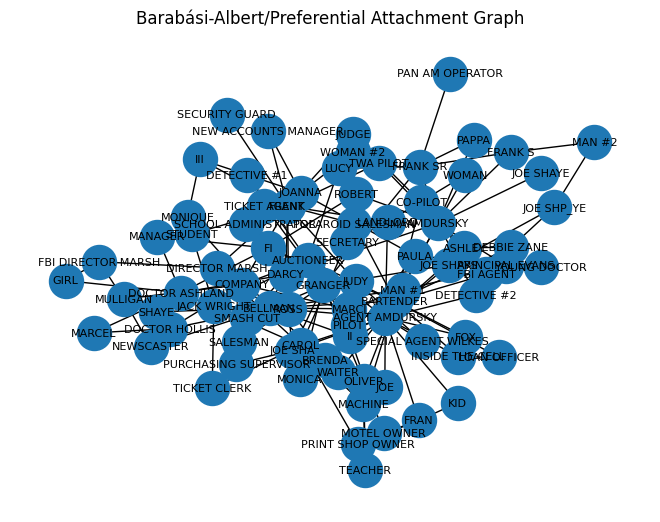

In [52]:
# Step 1: Define the Preferential Attachment Function
def preferential_attachment_barabasi_albert(num_nodes, m):
    GR = nx.Graph()
    GR.add_nodes_from(range(m))  # Start with m nodes

    # Adding edges between the initial set of nodes to form a connected component
    for i in range(m):
        for j in range(i + 1, m):
            GR.add_edge(i, j)

    # Preferential Attachment mode
    for new_node in range(m, num_nodes):
        # Connect the new node to existing nodes with probability proportional to their degree
        degrees = dict(GR.degree())
        total_degree = sum(degrees.values())
        probabilities = [degree / total_degree for degree in degrees.values()]

        # Choose m existing nodes based on probabilities
        chosen_nodes = random.choices(list(degrees.keys()), weights=probabilities, k=m)

        # Connect new node to the chosen existing nodes
        GR.add_node(new_node)
        GR.add_edges_from([(new_node, node) for node in chosen_nodes])

    return GR

# Step 2: Create the Preferential Attachment Graph
num_nodes = G.number_of_nodes()  # We use the number of nodes from our original graph G
m = 2  # Number of links per new node

# Create the Barabási-Albert/Preferential Attachment graph
ba_graph = preferential_attachment_barabasi_albert(num_nodes, m)

# Relabel nodes in ba_graph to match original graph's labeling for comparison
ba_graph = nx.relabel_nodes(ba_graph, count2)

# Step 3: Draw the Graph
pos = nx.spring_layout(ba_graph)
nx.draw(ba_graph, pos, with_labels=True, node_size=600, font_size=8)

plt.title("Barabási-Albert/Preferential Attachment Graph")
plt.show()

**Computing Average Degree**

In [57]:
average_degree_ba = (2 * nx.number_of_edges(ba_graph) / nx.number_of_nodes(ba_graph))
print(f'Average Degree of the Barabási-Albert Graph is: {average_degree_ba:.2f}')

Average Degree of the Barabási-Albert Graph is: 3.73


In our case, an average degree of around 3.73 means that each node in the graph is, on average, connected to approximately 3.73 other nodes. Since this isn't a whole number, it implies that some nodes have slightly more than 3 connections, while others have slightly fewer.

In the context of a preferential attachment model, as new nodes are added, they are more likely to connect to nodes with higher existing degrees. This results in a "rich get richer" effect, where nodes with many connections attract even more links.

Applying this to our dataset, characters that frequently appear in scenes with others are more likely to continue gaining new connections. This aligns well with the idea that prominent characters, who already interact often with others, are likely to keep being central figures in various scenes, establishing interactions with a wide range of other characters.

In [58]:
print(f'Average Degree of our graph: {2 * nx.number_of_edges(G) / nx.number_of_nodes(G):.2f}')
print(f'Average Degree of the Random Graph (for m={m}) is: {(2*nx.number_of_edges(ba_graph)/nx.number_of_nodes(ba_graph)):.2f}')

Average Degree of our graph: 3.95
Average Degree of the Random Graph (for m=4) is: 3.73


**However, if we choose the value of m to be 3.**

In [60]:

m = 3
ba_graph_random = preferential_attachment_barabasi_albert(num_nodes, m)
average_degree_random = (2 * nx.number_of_edges(ba_graph_random) / nx.number_of_nodes(ba_graph_random))
degree_difference = abs(average_degree_ba - average_degree_random)
print(f'Average Degree of the Random Graph (for m={m}) is: {average_degree_random:.2f} which has a difference of {degree_difference:.2f} from the Average Degree of our original Graph.')

Average Degree of the Random Graph (for m=3) is: 5.59 which has a difference of 1.85 from the Average Degree of our original Graph.


**Comparing the Betweenness Centrality with the Random Graph**

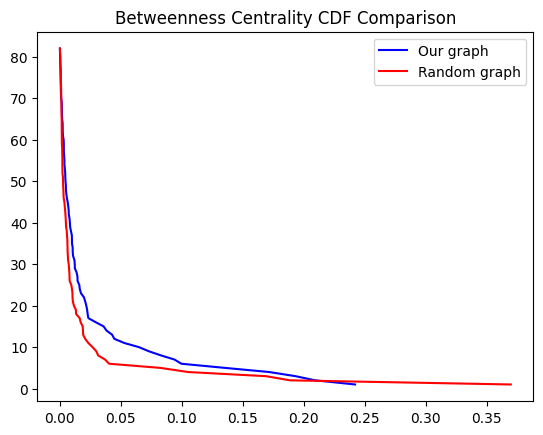

In [64]:
random_bet = nx.betweenness_centrality(ba_graph_random)
betw_values = list(nx.betweenness_centrality(ba_graph).values())
random_bet_values = list(random_bet.values())

cdf_x = []  # list of x-axis for our graph's betweenness centrality function
cdf_y = []  # list of y-axis for our graph's betweenness centrality function
cdf_X = []  # list of x-axis for the random graph's betweenness centrality function
cdf_Y = []  # list of y-axis for the random graph's betweenness centrality function

betw_values_copy = betw_values.copy()
random_bet_values_copy = random_bet_values.copy()

NN = len(betw_values_copy)
n = len(random_bet_values_copy)
N_temp = NN
n_temp = n

while betw_values_copy:
    current_min = min(betw_values_copy)
    current_num = betw_values_copy.count(current_min)
    cdf_x.append(current_min)
    cdf_y.append(N_temp)
    N_temp -= current_num
    for i in range(current_num):
        betw_values_copy.remove(current_min)

while random_bet_values_copy:
    current_min = min(random_bet_values_copy)
    current_num = random_bet_values_copy.count(current_min)
    cdf_X.append(current_min)
    cdf_Y.append(n_temp)
    n_temp -= current_num
    for i in range(current_num):
        random_bet_values_copy.remove(current_min)

plt.plot(cdf_x, cdf_y, 'b', label='Our graph')
plt.plot(cdf_X, cdf_Y, 'r', label='Random graph')
plt.legend(loc="upper right")
plt.title("Betweenness Centrality CDF Comparison")
plt.show()

**Comparing Diameter with the Random Graph**

In [65]:
print(f"Diameter of Our graph (G): {nx.diameter(G)}")
print(f"Diameter of Barabási-Albert graph (ba_graph): {nx.diameter(ba_graph)}")

Diameter of Our graph (G): 4
Diameter of Barabási-Albert graph (ba_graph): 6


We observe that the diameter of our graph (G) is 4, while the diameter of the Barabási–Albert graph (ba_graph) is 6. This indicates that our graph has a shorter maximum path length compared to the Barabási–Albert model. The difference in diameter suggests some structural variations between our graph and the generated model.

Despite this difference, the connectivity and other network features may still be comparable, which means the Barabási–Albert model can serve as an approximate representation of our graph. The comparison helps us understand the differences in overall graph structure, and it highlights that our graph tends to have more direct paths between nodes, possibly indicating a denser or more clustered network compared to the generated model.